In [1486]:
# loeme sisse vajalikud paketid
# numpy & pandas -> data manipulation
# yfinance aitab finants tickers sisse võtta
# Abi loomisel : Python for Finance: Mastering Data-Driven Finance 2nd Edition - Yves Hilpisch
import numpy as np 
import yfinance as yf
import pandas as pd 
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
import matplotlib
%matplotlib inline


In [1487]:
#loeme sisse S&P500 indexsi SPY 
df = yf.download("SPY", start="2003-01-01", end="2023-01-01")

[*********************100%***********************]  1 of 1 completed


In [1488]:
#saab ka lugeda sisse mitmeid tickereid korraga
#microsoft, coca-cola, apple, google, nike, visa, kellogs, 20 aasta võlakiri ETF,  
#Seekord võtame ainult SPY

symbols_multiple = "MSFT", "KO", "AAPL", "GOOG", "NKE", "V", "K", "TLT", "SPY", "^VIX"
symbols = "SPY" 

In [1489]:
#df -> dataframe
#df_multiple_symbols -> lisame ylevalt symbolid sisse 
df = yf.download(symbols, start="2013-01-01", end="2023-01-01")
df_multiple_symbols = yf.download(symbols_multiple, start="2013-01-01", end="2023-01-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  10 of 10 completed


In [1490]:
#vaatame dataframe
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,145.110001,146.149994,144.729996,146.059998,120.399712,192059000
2013-01-03,145.990005,146.369995,145.339996,145.729996,120.127663,144761800
2013-01-04,145.970001,146.610001,145.669998,146.369995,120.655182,116817700
2013-01-07,145.850006,146.110001,145.429993,145.970001,120.325493,110002500
2013-01-08,145.710007,145.910004,144.979996,145.550003,119.979301,121265100
...,...,...,...,...,...,...
2022-12-23,379.649994,383.059998,378.029999,382.910004,380.042480,59857300
2022-12-27,382.790009,383.149994,379.649994,381.399994,378.543793,51638200
2022-12-28,381.329987,383.390015,376.420013,376.660004,373.839264,70911500


In [1491]:
#võtame Close dataframist
close = df["Close"]

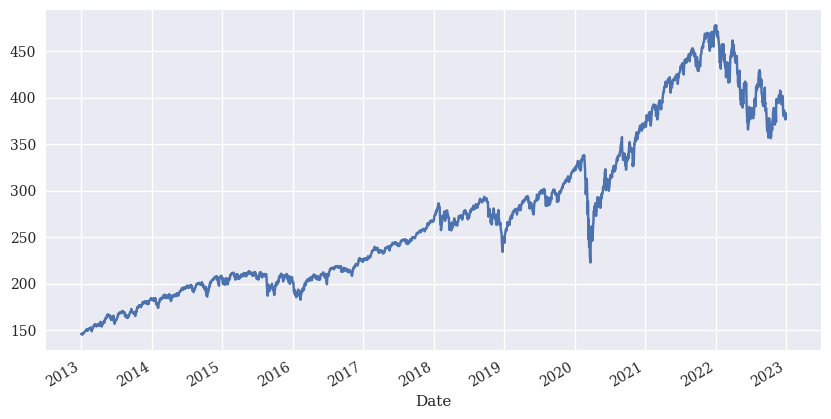

In [1492]:
#SPY close hind pildina
close.plot(figsize=(10,5), subplots=True);

In [1493]:
#SPY close hind yhikud, mea, standard deviation, min, 25%, 50%, 75%, max
close.describe().round(2) 

count    2518.00
mean      273.95
std        86.89
min       145.55
25%       205.14
50%       258.24
75%       326.81
max       477.71
Name: Close, dtype: float64

In [1494]:
#SPY close hind erinevad mõõtmed, 2 kohta peale koma
close.aggregate([min, np.mean, np.std, np.median,max]).round(2)

min       145.55
mean      273.95
std        86.89
median    258.24
max       477.71
Name: Close, dtype: float64

In [1495]:
#SPY percent hinnamuutus võtame 3 peale koma
close.pct_change().round(3).head()

Date
2013-01-02      NaN
2013-01-03   -0.002
2013-01-04    0.004
2013-01-07   -0.003
2013-01-08   -0.003
Name: Close, dtype: float64

In [1496]:
#close diff().mean()
close.diff().mean()

0.09390941403146107

In [1497]:
#dataframe mitmed symbolid ja close hind ainult
df_multiple_symbols = df_multiple_symbols["Close"] 

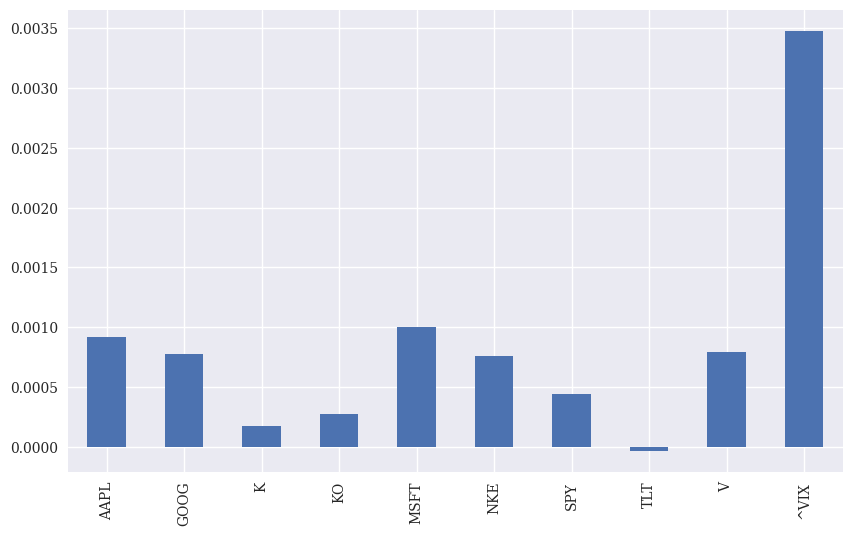

In [1498]:
#mitmed symbolid nende precent vahe ja mean
df_multiple_symbols.pct_change().mean().plot(kind='bar', figsize=(10, 6));

In [1499]:
#logaritmilised return vektori moodi
rets = np.log(df_multiple_symbols / df_multiple_symbols.shift(1))

In [1500]:
#logarimilised tulemused ja kolm kohta peale koma
rets.head().round(3) 

,AAPL,GOOG,K,KO,MSFT,NKE,SPY,TLT,V,^VIX
Date,,,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.013,0.001,-0.007,0.000,-0.013,0.010,-0.002,-0.014,0.001,-0.008
2013-01-04,-0.028,0.020,0.002,0.002,-0.019,0.010,0.004,0.004,0.008,-0.051
2013-01-07,-0.006,-0.004,0.000,-0.010,-0.002,0.002,-0.003,0.000,0.007,-0.003
2013-01-08,0.003,-0.002,0.003,-0.007,-0.005,-0.011,-0.003,0.007,0.009,-0.012


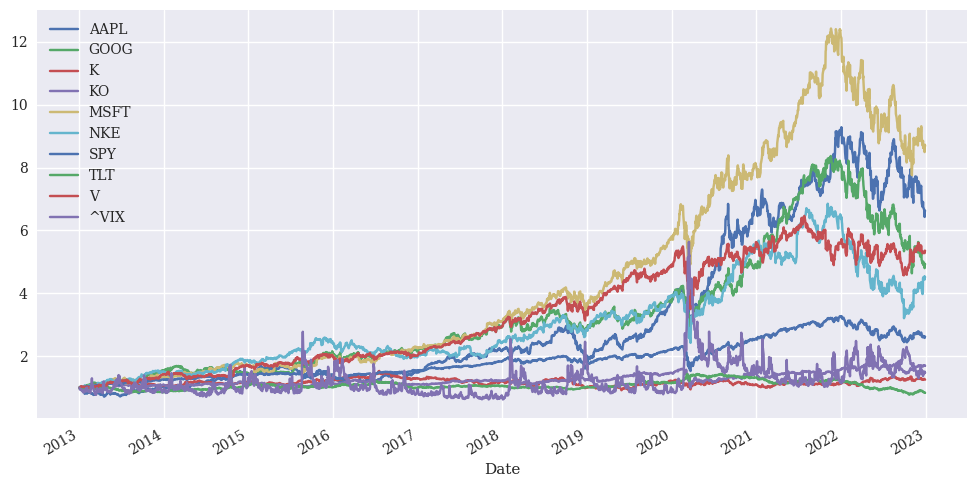

In [1501]:
#cumsum() on kumulatiivne summa 
# Erinevad stock tulemused 
rets.cumsum().apply(np.exp).plot(figsize=(12, 6));

In [1502]:
#vaatame tablelist millised tulemused on 
#parim Micrsoft 8.6x investment ja halvim 20 aasta võlakirja ETF
rets.cumsum().apply(np.exp)

,AAPL,GOOG,K,KO,MSFT,NKE,SPY,TLT,V,^VIX
Date,,,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.987378,1.000581,0.993147,1.000000,0.986604,1.010224,0.997741,0.986450,1.000772,0.991826
2013-01-04,0.959875,1.020353,0.995256,1.001596,0.968139,1.020062,1.002122,0.990298,1.008946,0.942098
2013-01-07,0.954228,1.015901,0.995607,0.992021,0.966329,1.021605,0.999384,0.990716,1.016154,0.939373
2013-01-08,0.956797,1.013896,0.998946,0.985106,0.961260,1.010802,0.996508,0.997240,1.025615,0.927793
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,6.724733,4.985642,1.268318,1.697340,8.643374,4.484954,2.621594,0.854466,5.298751,1.421662
2022-12-27,6.631405,4.881277,1.276928,1.707713,8.579290,4.535494,2.611256,0.837571,5.310593,1.474796
2022-12-28,6.427919,4.799672,1.260235,1.690692,8.491310,4.435957,2.578803,0.832636,5.277127,1.508174


In [1503]:
# Mitmed andmed 1 nädalase intervalliga ja ainult esimsed
df_multiple_symbols.resample('1w', label='left').last().head()

,AAPL,GOOG,K,KO,MSFT,NKE,SPY,TLT,V,^VIX
Date,,,,,,,,,,
2012-12-30,18.821428,18.380356,56.639999,37.660000,26.740000,26.440001,146.369995,118.400002,39.192501,13.83
2013-01-06,18.582144,18.430668,57.020000,36.910000,26.830000,26.549999,147.070007,119.849998,40.290001,13.36
2013-01-13,17.857143,17.546980,58.209999,37.700001,27.250000,26.645000,148.330002,120.040001,39.567501,12.46
2013-01-20,15.710000,18.771391,58.840000,37.049999,27.879999,27.775000,150.250000,118.029999,39.959999,12.89
2013-01-27,16.200714,19.317593,58.650002,37.540001,27.930000,26.850000,151.240005,115.540001,39.639999,12.90


In [1504]:
# Mitmed andmed 5 nädalase intervalliga
df_multiple_symbols.resample('5w', label='left').last().head()

,AAPL,GOOG,K,KO,MSFT,NKE,SPY,TLT,V,^VIX
Date,,,,,,,,,,
2012-12-02,18.821428,18.380356,56.639999,37.660000,26.740000,26.440001,146.369995,118.400002,39.192501,13.83
2013-01-06,16.963572,19.560930,58.910000,38.770000,27.549999,27.295000,151.800003,117.120003,39.450001,13.02
2013-02-10,15.845000,20.281481,62.200001,38.830002,28.040001,27.389999,155.830002,115.760002,39.637501,11.30
2013-03-17,13.947500,19.922077,66.099998,42.660000,29.770000,30.459999,155.479996,122.830002,40.990002,14.97
2013-04-21,15.898214,21.751471,64.449997,42.240002,34.270000,31.395000,165.309998,116.800003,45.112499,13.99


In [1505]:
#1 kuu intervalliga
df_multiple_symbols.resample('1m', label='left').last().head() 

,AAPL,GOOG,K,KO,MSFT,NKE,SPY,TLT,V,^VIX
Date,,,,,,,,,,
2012-12-31,16.267500,18.821701,58.500000,37.240002,27.450001,27.025000,149.699997,117.320000,39.477501,14.280000
2013-01-31,15.764286,19.955202,60.500000,38.720001,27.799999,27.230000,151.610001,118.510002,39.660000,15.510000
2013-02-28,15.809286,19.780607,64.430000,40.439999,28.610001,29.504999,156.669998,117.760002,42.459999,12.700000
2013-03-31,15.813571,20.537271,65.040001,42.330002,33.099998,31.799999,159.679993,123.010002,42.115002,13.520000
2013-04-30,16.061787,21.699165,62.049999,39.990002,34.900002,30.830000,163.449997,114.449997,44.535000,16.299999


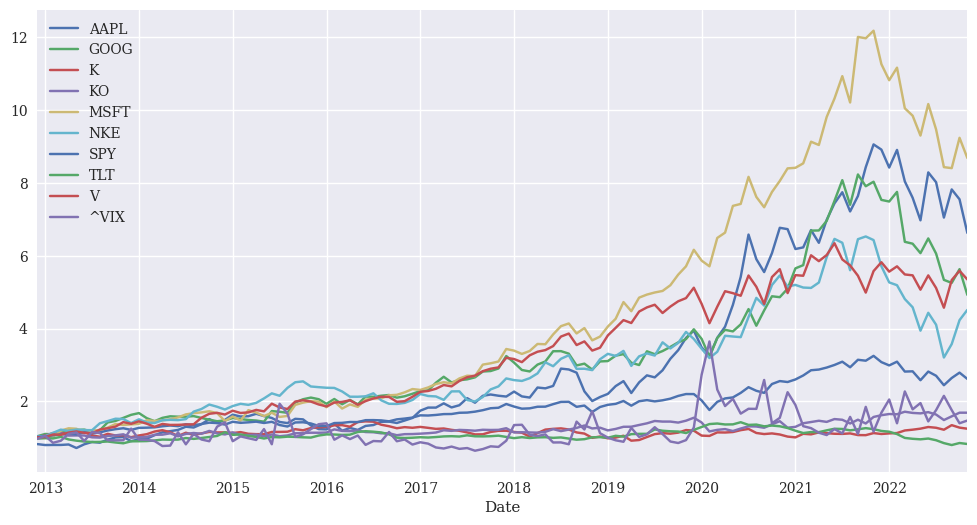

In [1506]:
#1 kuu intervalliga 
rets.cumsum().apply(np.exp).resample('1m', label='left').last().plot(figsize=(12, 6)); 

In [1507]:
#võtame yhe symboli ja eemaldame tyhjad
sym = 'KO'
df_multiple_symbols = pd.DataFrame(df_multiple_symbols[sym]).dropna()   
df_multiple_symbols.tail()

,KO
Date,
2022-12-23,63.820000
2022-12-27,64.209999
2022-12-28,63.570000
2022-12-29,63.950001
2022-12-30,63.610001


In [1508]:
#võtme numbri 20 ja kalkuleerime erinevad väärtused : min, mean, std, median, max, 
# ja ewma(exponential moving average)
window = 20 
df_multiple_symbols["min"] = df_multiple_symbols[sym].rolling(window=window).min()
df_multiple_symbols["mean"] = df_multiple_symbols[sym].rolling(window=window).mean()
df_multiple_symbols["std"] = df_multiple_symbols[sym].rolling(window=window).std()
df_multiple_symbols["median"] = df_multiple_symbols[sym].rolling(window=window).median()
df_multiple_symbols["max"] = df_multiple_symbols[sym].rolling(window=window).max()
df_multiple_symbols["ewma"] = df_multiple_symbols[sym].ewm(halflife = 0.5 ,min_periods=window).mean()

<AxesSubplot:xlabel='Date'>

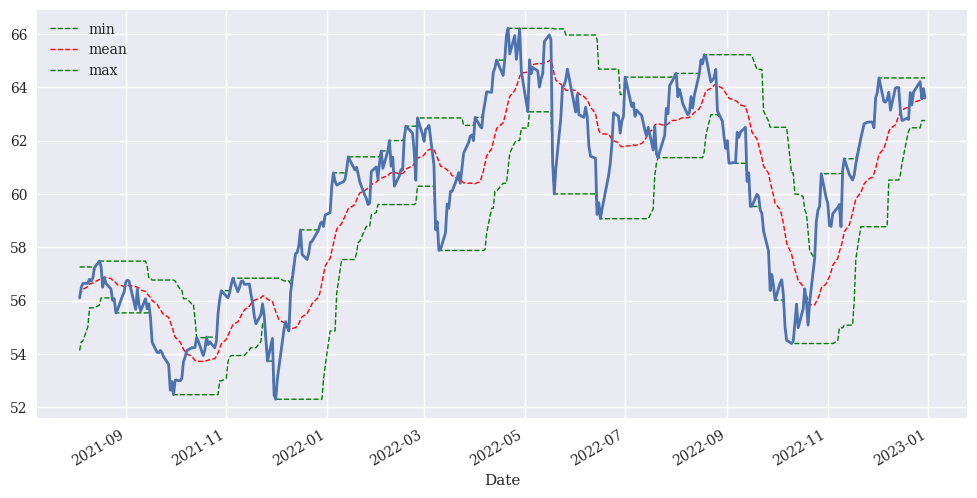

In [1509]:
#võtame 3 väärtust : min, mean ja max ja vaatame viimased 200 päeva, 
#rohelised max ja min ning punane ewmakeskel
keltner_channel = df_multiple_symbols[['min', 'mean', 'max']].iloc[-356:].plot(
    figsize=(12, 6), style=['g--', 'r--', 'g--'], lw=1)
df_multiple_symbols[sym].iloc[-356:].plot(ax=keltner_channel, lw=2.0)

In [1510]:
#võtame keskmised liikuvad keskmised 55 päeva ja 252 päeva
df_multiple_symbols['SMA1'] = df_multiple_symbols[sym].rolling(window=55).mean()
df_multiple_symbols['SMA2'] = df_multiple_symbols[sym].rolling(window=252).mean()
df_multiple_symbols[[sym, 'SMA1', 'SMA2']].tail()

,KO,SMA1,SMA2
Date,,,
2022-12-23,63.820000,60.423818,61.590278
2022-12-27,64.209999,60.600182,61.612341
2022-12-28,63.570000,60.767091,61.630952
2022-12-29,63.950001,60.939273,61.650794
2022-12-30,63.610001,61.093273,61.669960


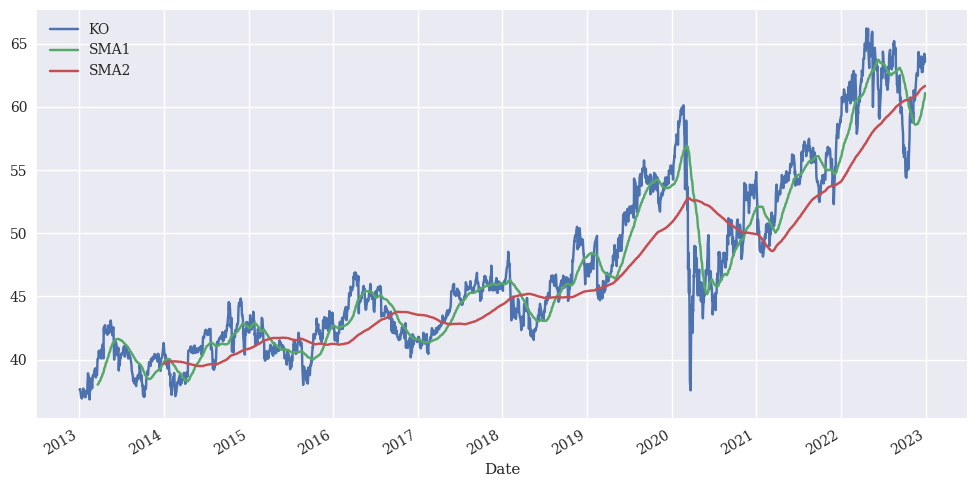

In [1511]:
#toome graafikuna välja
df_multiple_symbols[[sym, 'SMA1', 'SMA2']].plot(figsize=(12, 6));

In [1512]:
#igaks juhuks ainult tulbad kus on väärtused
df_multiple_symbols.dropna(inplace=True)

In [1513]:
df_multiple_symbols['positions'] = np.where(df_multiple_symbols['SMA1'] > df_multiple_symbols['SMA2'], 1, -1)

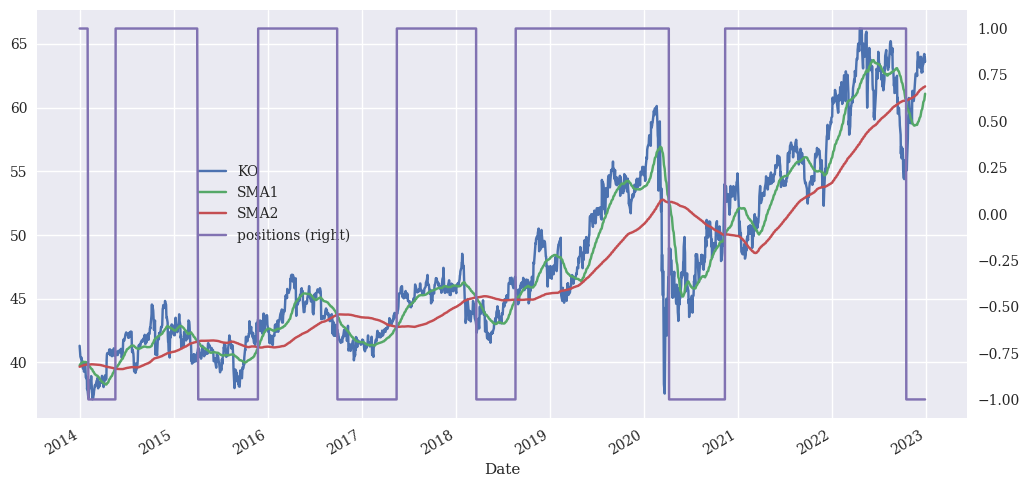

In [1514]:
keltner_channel = df_multiple_symbols[[sym, 'SMA1', 'SMA2', 'positions']].plot(
    figsize=(12, 6),secondary_y='positions')
keltner_channel.get_legend().set_bbox_to_anchor((0.35, 0.65));

In [1515]:
#võtame puhtalt symbolid ja lisame vix (nn fear index)
symbols_multiple = "MSFT", "KO", "AAPL", "GOOG", "NKE", "V", "K", "TLT", "^VIX", "SPY"
df_multiple_symbols = yf.download(symbols_multiple, start="2013-01-01", end="2023-01-01")


[*********************100%***********************]  10 of 10 completed


In [1516]:
df_multiple_symbols["Close"]

,AAPL,GOOG,K,KO,MSFT,NKE,SPY,TLT,V,^VIX
Date,,,,,,,,,,
2013-01-02,19.608213,18.013729,56.910000,37.599998,27.620001,25.920000,146.059998,119.559998,38.845001,14.680000
2013-01-03,19.360714,18.024191,56.520000,37.599998,27.250000,26.184999,145.729996,117.940002,38.875000,14.560000
2013-01-04,18.821428,18.380356,56.639999,37.660000,26.740000,26.440001,146.369995,118.400002,39.192501,13.830000
2013-01-07,18.710714,18.300158,56.660000,37.299999,26.690001,26.480000,145.970001,118.449997,39.472500,13.790000
2013-01-08,18.761070,18.264042,56.849998,37.040001,26.549999,26.200001,145.550003,119.230003,39.840000,13.620000
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,131.860001,89.809998,72.180000,63.820000,238.729996,116.250000,382.910004,102.160004,205.830002,20.870001
2022-12-27,130.029999,87.930000,72.669998,64.209999,236.960007,117.559998,381.399994,100.139999,206.289993,21.650000
2022-12-28,126.040001,86.459999,71.720001,63.570000,234.529999,114.980003,376.660004,99.550003,204.990005,22.139999


In [1517]:
#Close price ning SPY ja VIX ainult
df_multiple_symbols = df_multiple_symbols["Close"] 
df_multiple_symbols = df_multiple_symbols[["SPY", "^VIX"]].dropna()
df_multiple_symbols


,SPY,^VIX
Date,,
2013-01-02,146.059998,14.680000
2013-01-03,145.729996,14.560000
2013-01-04,146.369995,13.830000
2013-01-07,145.970001,13.790000
2013-01-08,145.550003,13.620000
...,...,...
2022-12-23,382.910004,20.870001
2022-12-27,381.399994,21.650000
2022-12-28,376.660004,22.139999


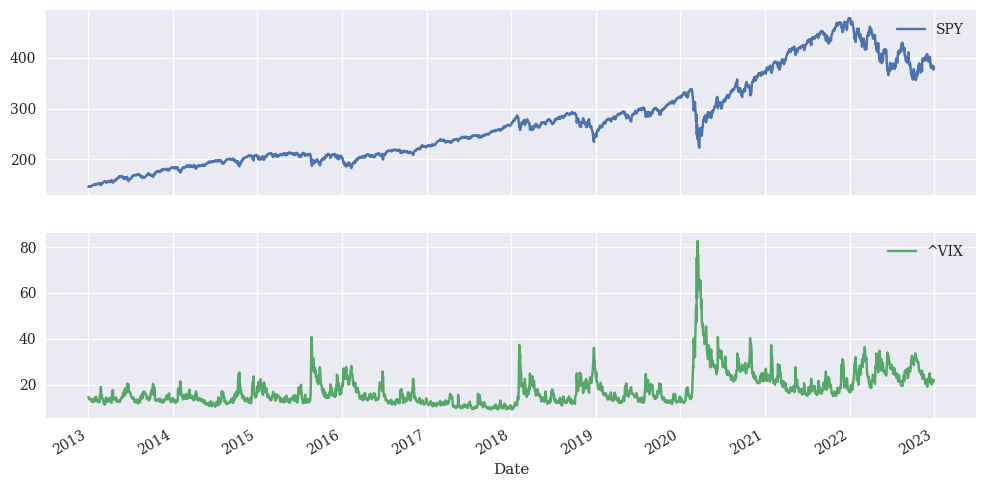

In [1518]:
#Graafik subplots kasutades
df_multiple_symbols.plot(subplots=True, figsize=(12, 6));

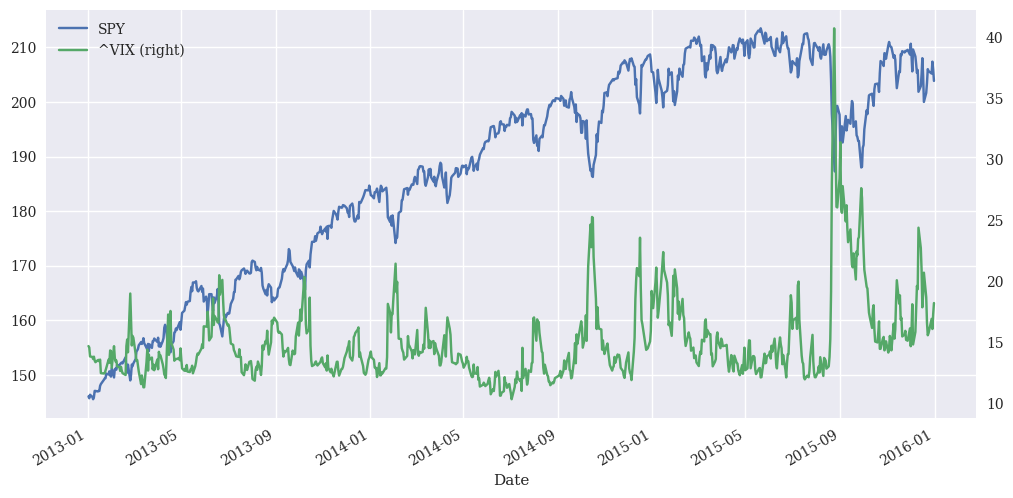

In [1519]:
#SPY ja VIC kasutades secondary_y 
df_multiple_symbols.loc[:"2015-12-31"].plot(secondary_y="^VIX", figsize=(12, 6)); 

In [1520]:
rets = np.log(df_multiple_symbols / df_multiple_symbols.shift(1))
rets.head()

,SPY,^VIX
Date,,
2013-01-02,NaN,NaN
2013-01-03,-0.002262,-0.008208
2013-01-04,0.004382,-0.051438
2013-01-07,-0.002736,-0.002896
2013-01-08,-0.002881,-0.012404


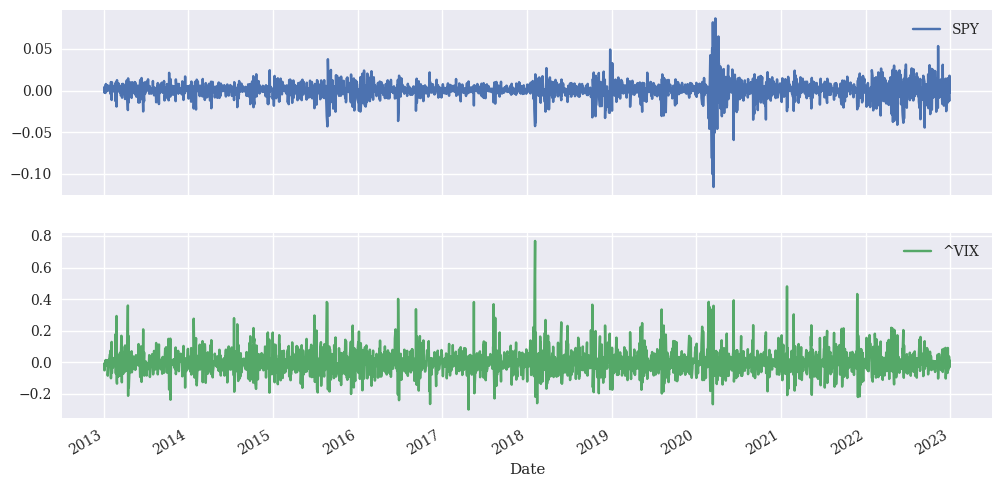

In [1521]:
rets.dropna(inplace=True)
rets.plot(subplots=True, figsize=(12, 6));

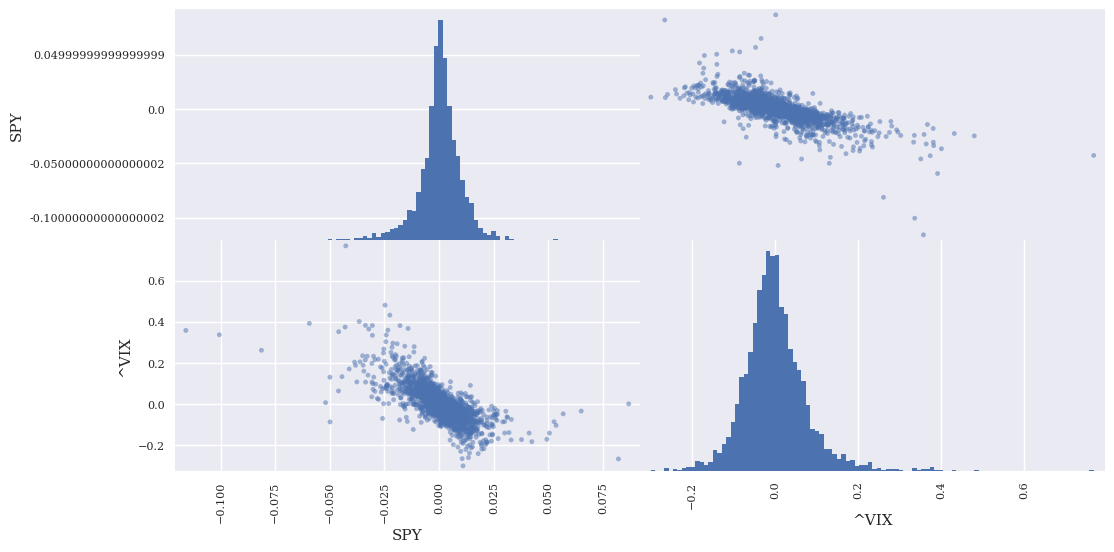

In [1522]:
#koostame scatterplot maatrixi
#alpho->täppide tugevus, diagonal=>histogram, bins on mitu tulpa
pd.plotting.scatter_matrix(rets, alpha=0.5, diagonal='hist', 
hist_kwds={'bins': 100}, figsize=(12, 6));

In [1523]:
rets

,SPY,^VIX
Date,,
2013-01-03,-0.002262,-0.008208
2013-01-04,0.004382,-0.051438
2013-01-07,-0.002736,-0.002896
2013-01-08,-0.002881,-0.012404
2013-01-09,0.002539,0.013854
...,...,...
2022-12-23,0.005736,-0.051365
2022-12-27,-0.003951,0.036693
2022-12-28,-0.012506,0.022380


In [1524]:
#regression
reg = np.polyfit(rets["SPY"], rets["^VIX"], deg=1) 

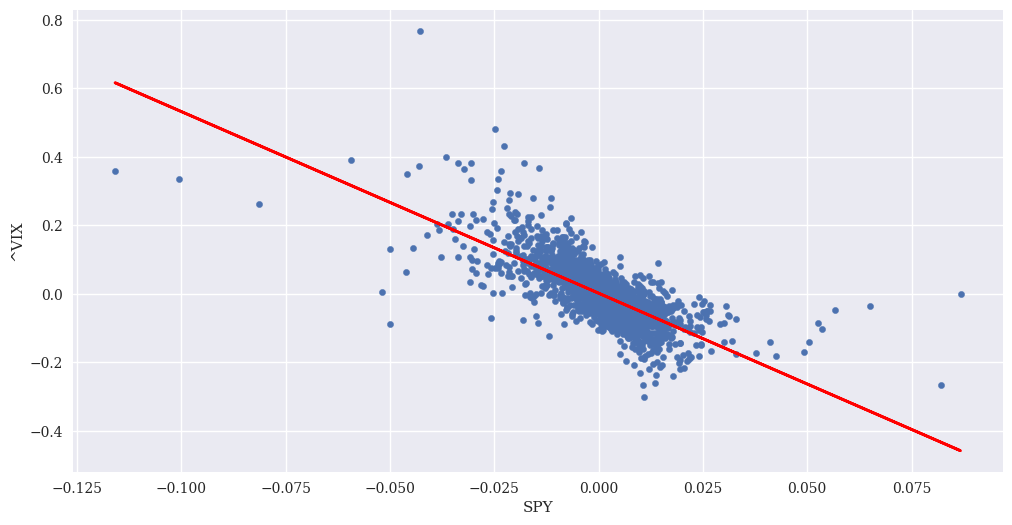

In [1525]:
#loome scatterplot ja lisamese sellele linear regression line, enne loomist peab muutma .values abil andmeteks
#saame välja lugeda, et mida suurem volatility on vix seda suurem on SPY keskmine langus
regression = rets.plot(kind='scatter', x="SPY", y="^VIX", figsize=(12, 6))
values1=rets["SPY"].values
regression.plot(values1, np.polyval(reg, rets["SPY"]), 'r', lw=2); 

In [1526]:
rets.corr()


,SPY,^VIX
SPY,1.000000,-0.730302
^VIX,-0.730302,1.000000


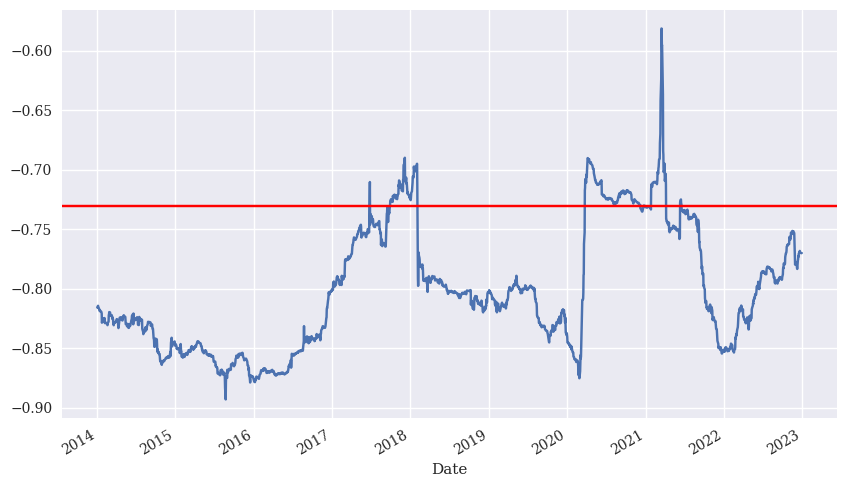

In [1527]:
regression = rets['SPY'].rolling(window=252).corr(rets['^VIX']).plot(figsize=(10, 6))
regression.axhline(rets.corr().iloc[0, 1], c='r');

In [1528]:
#vaatame eurodollarit ja loome selle jaoks nn "mid" väärtuse
#valuutad enamasti ei ole väga kõikuvad ja selleks see sobib, ühik on EURODOLLAR
symbols_multiple =  "EURUSD=X"
df_multiple_symbols = yf.download(symbols_multiple, start="2023-06-06", end="2023-07-07", interval="5m")

[*********************100%***********************]  1 of 1 completed


In [1529]:
df_multiple_symbols.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6162 entries, 2023-06-06 00:00:00+01:00 to 2023-07-05 15:30:00+01:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6162 non-null   float64
 1   High       6162 non-null   float64
 2   Low        6162 non-null   float64
 3   Close      6162 non-null   float64
 4   Adj Close  6162 non-null   float64
 5   Volume     6162 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 337.0 KB


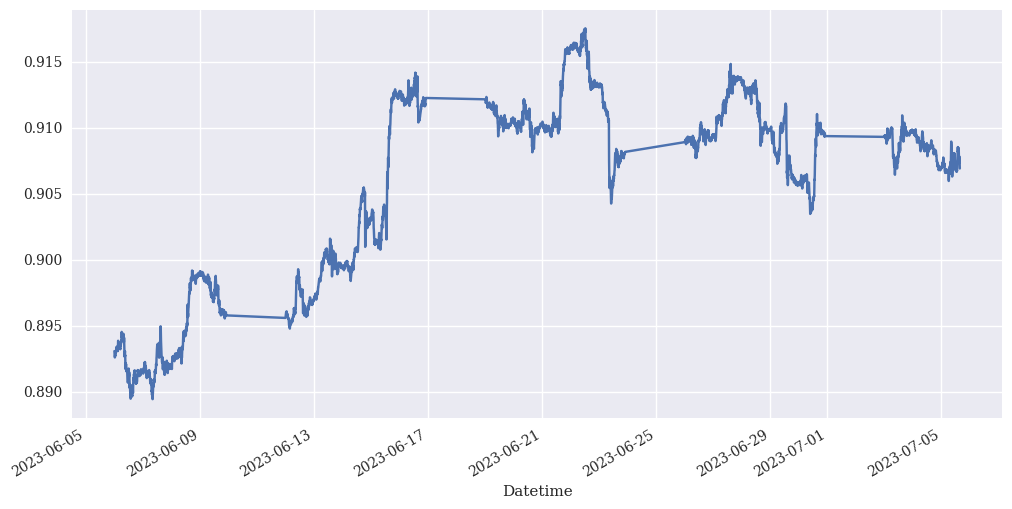

In [1530]:
df_multiple_symbols['Mid'] = df_multiple_symbols.mean(axis=1)
df_multiple_symbols['Mid'].plot(figsize=(12, 6));

In [1531]:
#reset data
symbols_multiple =  "SPY", "KO", "K", "MCD", "CL", "JNJ", "V"
df_multiple_symbols = yf.download(symbols_multiple, start="2013-06-06", end="2023-07-07")

[*********************100%***********************]  7 of 7 completed


In [1532]:
#cleanup
df_multiple_symbols = df_multiple_symbols.dropna()
df_multiple_symbols = df_multiple_symbols["Close"]

<AxesSubplot:xlabel='Date'>

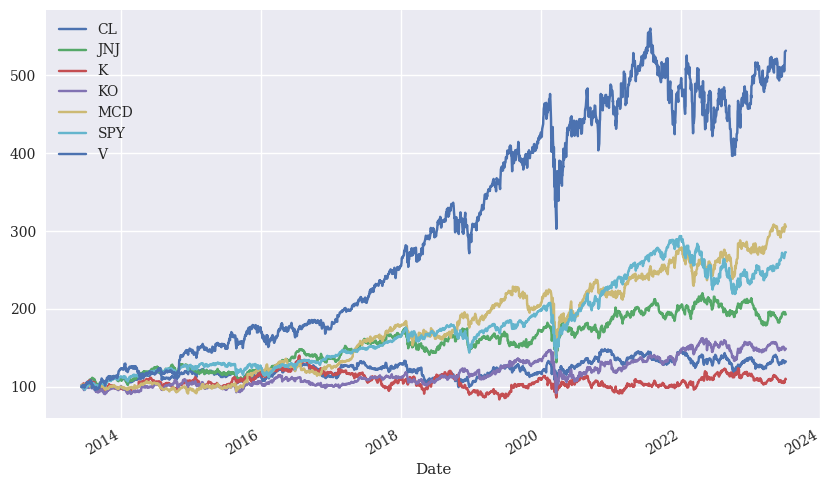

In [1533]:
(df_multiple_symbols / df_multiple_symbols.iloc[0] * 100).plot(figsize=(10, 6))

In [1534]:
log_returns = np.log(df_multiple_symbols / df_multiple_symbols.shift(1))
log_returns.head()

,CL,JNJ,K,KO,MCD,SPY,V
Date,,,,,,,
2013-06-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-06-07,0.018098,0.005314,0.021527,0.015085,0.016414,0.012640,0.003284
2013-06-10,-0.004749,0.002705,-0.005061,-0.005570,0.012639,0.000000,0.013195
2013-06-11,-0.003406,-0.005299,-0.001110,-0.009516,-0.013147,-0.010369,-0.014752
2013-06-12,-0.007878,-0.011281,-0.002543,-0.009855,0.000102,-0.008312,-0.002843


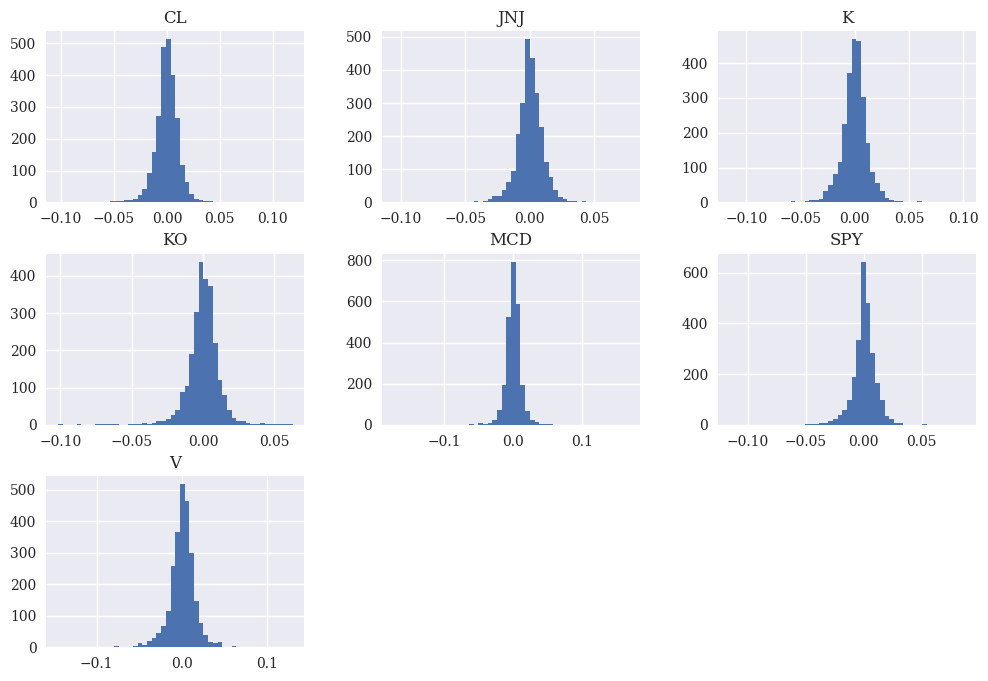

In [1535]:
log_returns.hist(bins=50, figsize=(12, 8));

In [1536]:
def print_statistics(array):

        sta = scs.describe(array)
        print('%14s %15s' % ('statistic', 'value'))
        print(30 * '-')
        print('%14s %15.5f' % ('size', sta[0]))
        print('%14s %15.5f' % ('min', sta[1][0]))
        print('%14s %15.5f' % ('max', sta[1][1]))
        print('%14s %15.5f' % ('mean', sta[2]))
        print('%14s %15.5f' % ('std', np.sqrt(sta[3])))
        print('%14s %15.5f' % ('skew', sta[4]))
        print('%14s %15.5f' % ('kurtosis', sta[5]))

In [1537]:
for sym in symbols_multiple:
    print('\nResults for symbol {}'.format(sym))
    print(30 * '-')
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data) 


Results for symbol SPY
------------------------------
     statistic           value
------------------------------
          size      2536.00000
           min        -0.11589
           max         0.08673
          mean         0.00040
           std         0.01108
          skew        -0.80285
      kurtosis        13.83992

Results for symbol KO
------------------------------
     statistic           value
------------------------------
          size      2536.00000
           min        -0.10173
           max         0.06278
          mean         0.00016
           std         0.01136
          skew        -0.96060
      kurtosis        10.76275

Results for symbol K
------------------------------
     statistic           value
------------------------------
          size      2536.00000
           min        -0.11563
           max         0.10116
          mean         0.00004
           std         0.01302
          skew        -0.45824
      kurtosis        10.84939



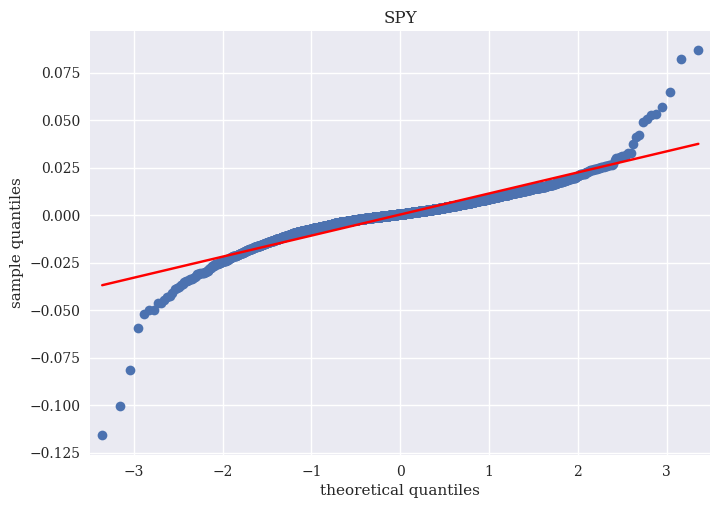

In [1538]:
import statsmodels.api as sm
sm.qqplot(log_returns['SPY'].dropna(), line='s')
plt.title('SPY')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');

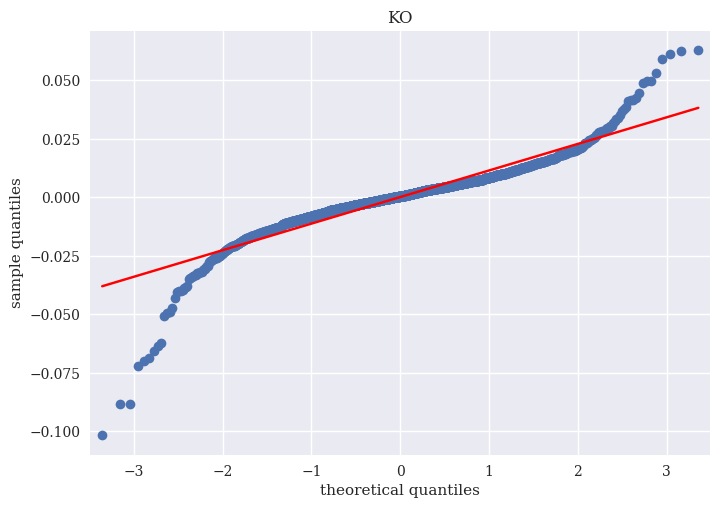

In [1539]:
import statsmodels.api as sm
sm.qqplot(log_returns['KO'].dropna(), line='s')
plt.title('KO')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');

In [1540]:
import scipy.stats as scs
def normality_tests(arr):
    ''' Tests for normality distribution of given data set.'''
    print('Skew of data set  %14.3f' % scs.skew(arr))
    print('Skew test p-value %14.3f' % scs.skewtest(arr)[1])
    print('Kurt of data set  %14.3f' % scs.kurtosis(arr))
    print('Kurt test p-value %14.3f' % scs.kurtosistest(arr)[1])
    print('Norm test p-value %14.3f' % scs.normaltest(arr)[1])

In [1541]:
for sym in symbols_multiple:
    print('\nResults for symbol {}'.format(sym))
    print(32 * '-')
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data) 


Results for symbol SPY
--------------------------------
Skew of data set          -0.803
Skew test p-value          0.000
Kurt of data set          13.840
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol KO
--------------------------------
Skew of data set          -0.961
Skew test p-value          0.000
Kurt of data set          10.763
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol K
--------------------------------
Skew of data set          -0.458
Skew test p-value          0.000
Kurt of data set          10.849
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol MCD
--------------------------------
Skew of data set          -0.128
Skew test p-value          0.009
Kurt of data set          33.378
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol CL
--------------------------------
Skew of data set          -0.046
Skew test p-value         

In [1542]:
rets = np.log(df_multiple_symbols / df_multiple_symbols.shift(1))

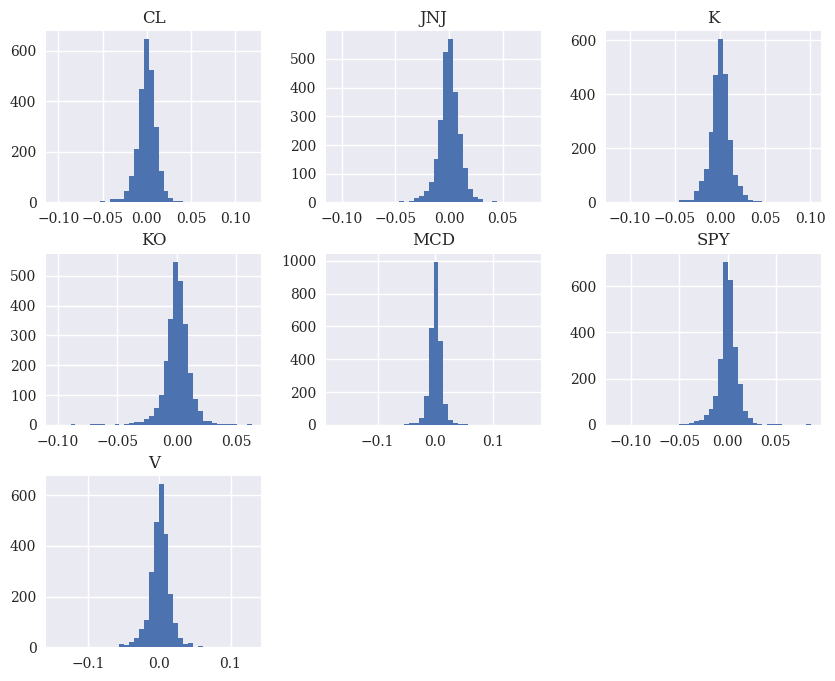

In [1543]:
rets.hist(bins=40, figsize=(10, 8));

In [1544]:
#yhe aasta mean tulemus
rets.mean() * 252 

CL     0.027869
JNJ    0.065332
K      0.009421
KO     0.039631
MCD    0.110964
SPY    0.099657
V      0.165949
dtype: float64

In [1545]:
#Annualized covariance matrix
rets.cov() * 252

,CL,JNJ,K,KO,MCD,SPY,V
CL,0.035496,0.017403,0.019965,0.020471,0.017308,0.017861,0.019372
JNJ,0.017403,0.031924,0.014698,0.016432,0.015442,0.018363,0.020018
K,0.019965,0.014698,0.042701,0.017245,0.011142,0.012431,0.011231
KO,0.020471,0.016432,0.017245,0.032506,0.018697,0.019233,0.021515
MCD,0.017308,0.015442,0.011142,0.018697,0.039681,0.021779,0.026267
SPY,0.017861,0.018363,0.012431,0.019233,0.021779,0.030959,0.033748
V,0.019372,0.020018,0.011231,0.021515,0.026267,0.033748,0.062543


In [1546]:
#vaatame SPY ja QQQ erinevusi
symbols_multiple =  "SPY", "QQQ"
df_multiple_symbols = yf.download(symbols_multiple, start="2013-06-06", end="2023-07-07")


[*********************100%***********************]  2 of 2 completed


In [1547]:
df_multiple_symbols = df_multiple_symbols / df_multiple_symbols.iloc[0]
df_multiple_symbols = df_multiple_symbols["Close"]
df_multiple_symbols.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2537 entries, 2013-06-06 to 2023-07-05
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   QQQ     2537 non-null   float64
 1   SPY     2537 non-null   float64
dtypes: float64(2)
memory usage: 59.5 KB


In [1548]:
df_multiple_symbols.iloc[-1] / df_multiple_symbols.iloc[0] - 1

QQQ    4.133322
SPY    1.726111
dtype: float64

In [1549]:
df_multiple_symbols.corr()

,QQQ,SPY
QQQ,1.000000,0.990602
SPY,0.990602,1.000000


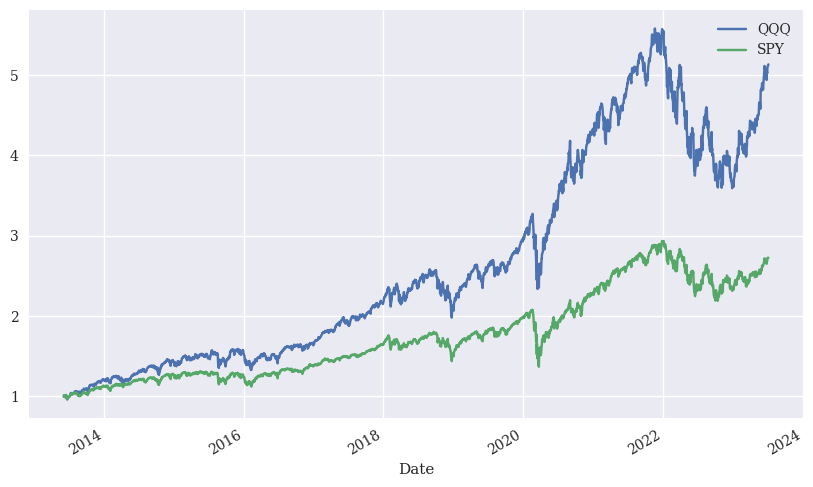

In [1550]:
df_multiple_symbols.plot(figsize=(10, 6));

In [1551]:
##Vaatama SMA ja Optimiseerime
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

#reset data
symbols_multiple =  "SPY", "KO", "CL", "V"
df_multiple_symbols = yf.download(symbols_multiple, start="2013-06-06", end="2023-07-07")
df_multiple_symbols = df_multiple_symbols["Close"]

[*********************100%***********************]  4 of 4 completed


In [1552]:
df_multiple_symbols.dropna()


,CL,KO,SPY,V
Date,,,,
2013-06-06,58.040001,40.790001,162.729996,44.837502
2013-06-07,59.099998,41.410000,164.800003,44.985001
2013-06-10,58.820000,41.180000,164.800003,45.582500
2013-06-11,58.619999,40.790001,163.100006,44.915001
2013-06-12,58.160000,40.389999,161.750000,44.787498
...,...,...,...,...
2023-06-28,75.910004,60.520000,436.390015,227.960007
2023-06-29,76.559998,60.020000,438.109985,234.320007
2023-06-30,77.040001,60.220001,443.279999,237.479996


In [1553]:
symbol = "SPY"
data = ( pd.DataFrame(df_multiple_symbols[symbol]).dropna())

In [1554]:
SMA1 = 55;
SMA2 = 233;

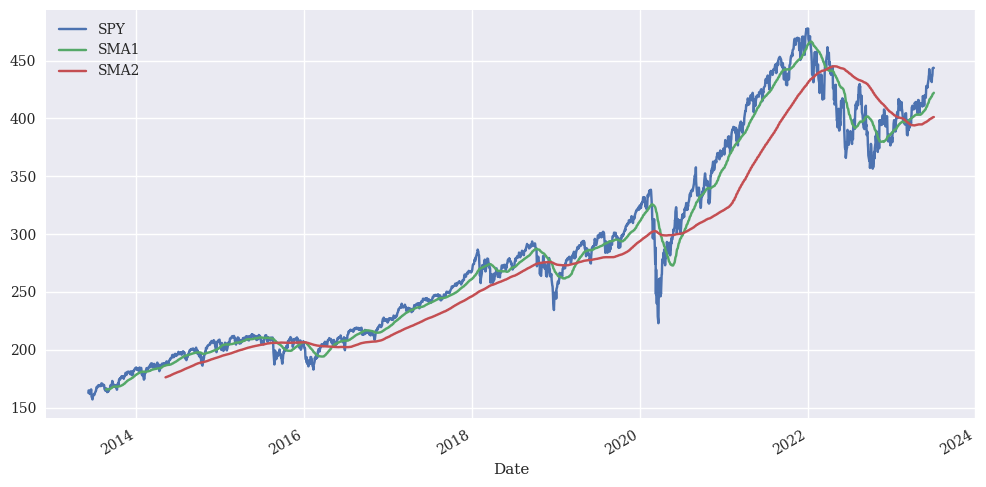

In [1555]:
data['SMA1'] = data["SPY"].rolling(SMA1).mean() 
data['SMA2'] = data["SPY"].rolling(SMA2).mean()
data.plot(figsize=(12, 6));

In [1556]:
#vaatame millal yks ma on allapool teist ja loome positisooni 1 ja -1
data.dropna(inplace=True)
data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
data.tail()

,SPY,SMA1,SMA2,Position
Date,,,,
2023-06-28,436.390015,419.870000,400.500215,1
2023-06-29,438.109985,420.386182,400.702876,1
2023-06-30,443.279999,421.026727,400.884164,1
2023-07-03,443.790009,421.578000,401.046052,1
2023-07-05,443.620087,422.144547,401.181803,1


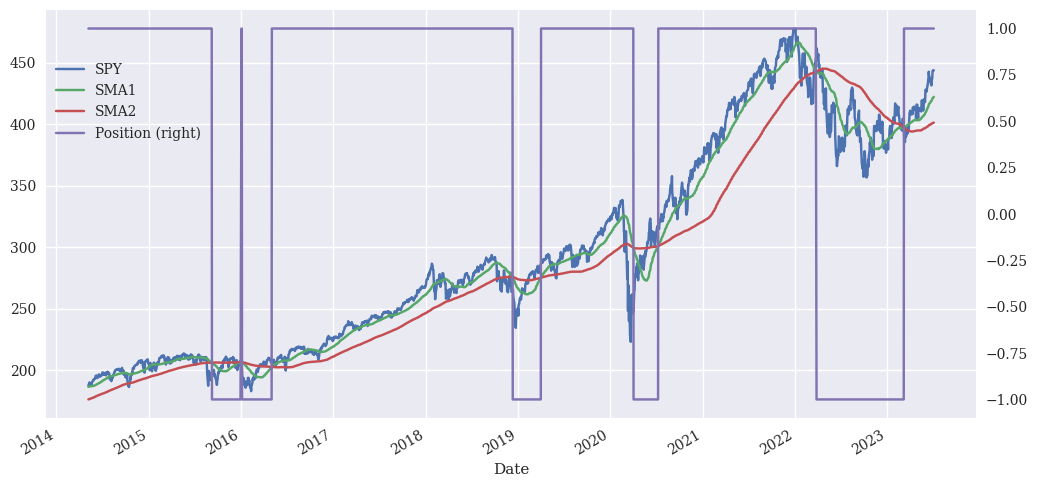

In [1557]:
ax = data.plot(secondary_y='Position', figsize=(12, 6))
ax.get_legend().set_bbox_to_anchor((0.18, 0.90));

In [1558]:
data['Returns'] = np.log(data[symbol] / data[symbol].shift(1))
data['Strategy'] = data['Position'].shift(1) * data['Returns'] 
data.round(4).head()

,SPY,SMA1,SMA2,Position,Returns,Strategy
Date,,,,,,
2014-05-08,187.68,186.3993,176.1515,1,NaN,NaN
2014-05-09,187.96,186.4695,176.2598,1,0.0015,0.0015
2014-05-12,189.79,186.5767,176.3670,1,0.0097,0.0097
2014-05-13,189.96,186.6685,176.4750,1,0.0009,0.0009
2014-05-14,189.06,186.7453,176.5864,1,-0.0047,-0.0047


In [1559]:
np.exp(data[['Returns', 'Strategy']].sum())

Returns     2.363705
Strategy    1.468072
dtype: float64

In [1560]:
#volatility and benchmark investment
data[['Returns', 'Strategy']].std() * 252 ** 0.5 

Returns     0.181097
Strategy    0.181174
dtype: float64

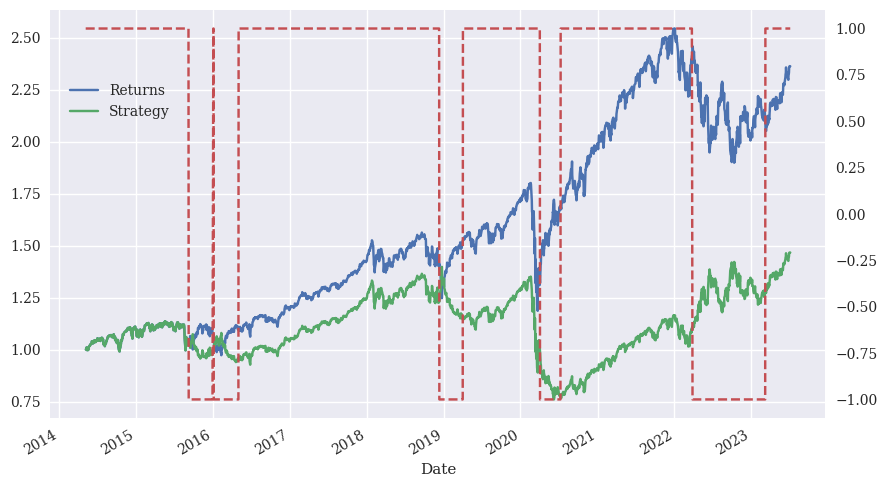

In [1561]:
#vaatame returns and stregy tulemusi
ax = data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))
data['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend().set_bbox_to_anchor((0.17, 0.85));

In [1710]:
from itertools import product

sma1 = range(20, 61, 4)  
sma2 = range(180, 281, 10)  

results = pd.DataFrame()
for SMA1, SMA2 in product(sma1, sma2):  
    data = pd.DataFrame(df_multiple_symbols[symbol])
    data.dropna(inplace=True)
    data['Returns'] = np.log(data[symbol] / data[symbol].shift(1))
    data['SMA1'] = data[symbol].rolling(SMA1).mean()
    data['SMA2'] = data[symbol].rolling(SMA2).mean()
    data.dropna(inplace=True)
    data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
    data['Strategy'] = data['Position'].shift(1) * data['Returns']
    data.dropna(inplace=True)
    perf = np.exp(data[['Returns', 'Strategy']].sum())
    results = pd.concat([results, pd.DataFrame(
                {'SMA1': SMA1, 'SMA2': SMA2,
                'MARKET': perf['Returns'],
                'STRATEGY': perf['Strategy'],
                'OUT': perf['Strategy'] - perf['Returns']},
                index=[1])])
    

In [1708]:
results

,SMA1,SMA2,MARKET,STRATEGY,OUT
1,20,180,2.412421,1.446950,-0.965471
1,20,190,2.356422,1.630079,-0.726343
1,20,200,2.382492,1.245097,-1.137395
1,20,210,2.379936,0.949667,-1.430269
1,20,220,2.371793,1.050674,-1.321119
...,...,...,...,...,...
1,60,240,2.350430,1.432454,-0.917976
1,60,250,2.300934,1.481947,-0.818987
1,60,260,2.276960,1.398605,-0.878355
1,60,270,2.251536,1.293642,-0.957894


In [1709]:
results.sort_values('OUT', ascending=False).head(7)

,SMA1,SMA2,MARKET,STRATEGY,OUT
1,20,190,2.356422,1.630079,-0.726343
1,44,260,2.276960,1.541471,-0.735489
1,40,270,2.251536,1.509886,-0.741650
1,44,250,2.300934,1.508946,-0.791988
1,60,250,2.300934,1.481947,-0.818987
1,24,190,2.356422,1.529354,-0.827069
1,44,270,2.251536,1.423659,-0.827876
